## Approach Ln

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import poisson
from scipy.stats import poisson
from scipy.stats import chisquare

In [3]:
compras = pd.read_excel('informacion_compra.xlsx')

In [4]:
compras

,Producto,Unidades,Factura
0,48443,1,799186
1,42877,1,717106
2,48296,1,468125
3,34704,1,176490
4,47158,2,674550
...,...,...,...
31649,35303,2,778814
31650,37584,1,632798
31651,19418,1,784747
31652,40176,1,73823


In [5]:
facturas = []
productos = []
for _,i in compras.iterrows():
    facturas += [i[2]]*i[1]
for _,i in compras.iterrows():
    productos += [i[0]]*i[1]

compras = pd.DataFrame({
    "Factura": facturas,
    "Producto": productos
})

In [22]:
df = compras.groupby(['Factura']).size().reset_index(name='Frequency').Frequency.value_counts()
df = df.reset_index()
df.columns = ['Pedidos', 'Frecuencia']
df['Frecuencia ln'] = np.log(df['Frecuencia'])
valor_medio = np.sum(df['Pedidos'] * df['Frecuencia ln']) / np.sum(df['Frecuencia ln'])
df['Poisson Original'] = poisson.pmf(df['Pedidos'], valor_medio)
df['Poisson'] = poisson.pmf(df['Pedidos'], valor_medio)

df['valores_esperados'] = df['Poisson'] * np.sum(df['Frecuencia ln'])
df

,Pedidos,Frecuencia,Frecuencia ln,Poisson Original,Poisson,valores_esperados
0,1,19235,9.864487,1.167233e-02,1.167233e-02,7.833106e-01
1,2,3546,8.173575,3.670598e-02,3.670598e-02,2.463277e+00
2,3,1024,6.931472,7.695285e-02,7.695285e-02,5.164178e+00
3,4,478,6.169611,1.209968e-01,1.209968e-01,8.119895e+00
4,5,194,5.267858,1.521995e-01,1.521995e-01,1.021385e+01
5,6,131,4.875197,1.595406e-01,1.595406e-01,1.070650e+01
6,7,61,4.110874,1.433449e-01,1.433449e-01,9.619637e+00
7,8,30,3.401197,1.126942e-01,1.126942e-01,7.562718e+00
8,10,28,3.332205,4.953103e-02,4.953103e-02,3.323945e+00
9,11,22,3.091042,2.832004e-02,2.832004e-02,1.900511e+00


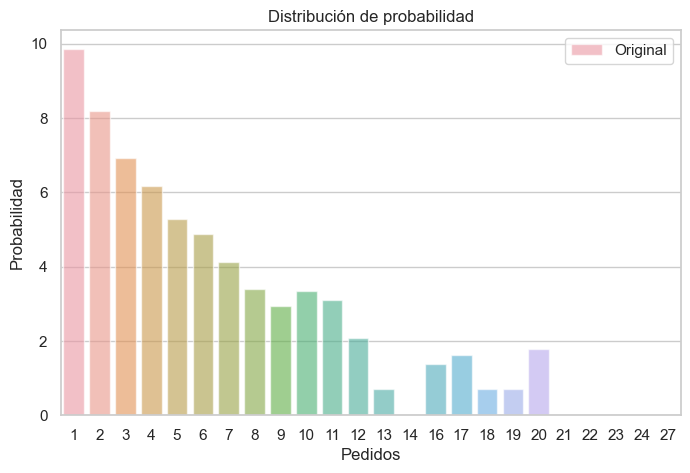

In [26]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(8, 5))

# Plot the first set of bars with higher transparency
#sns.barplot(x='Pedidos', y='Poisson', data=df, alpha=0.6, label='Frecuencias normalizadas')

sns.barplot(x='Pedidos', y='Frecuencia ln', data=df, alpha=0.6, label = 'Original')

# Plot the second set of bars with lower transparency
#sns.barplot(x='Pedidos', y='Frecuencia ln', data=df, alpha=0.3, label='Valores')

# Add labels and title
plt.xlabel('Pedidos')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad')

# Show legend
plt.legend()

# Show the plot
plt.show()


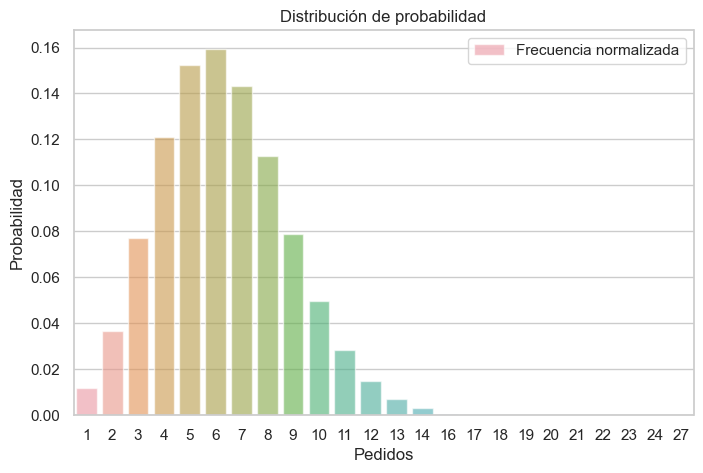

In [28]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(8, 5))

# Plot the first set of bars with higher transparency
#sns.barplot(x='Pedidos', y='Poisson', data=df, alpha=0.6, label='Frecuencias normalizadas')

sns.barplot(x='Pedidos', y='Poisson', data=df, alpha=0.6, label = 'Frecuencia normalizada')

# Plot the second set of bars with lower transparency
#sns.barplot(x='Pedidos', y='Frecuencia ln', data=df, alpha=0.3, label='Valores')

# Add labels and title
plt.xlabel('Pedidos')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad')

# Show legend
plt.legend()

# Show the plot
plt.show()


### Distribución de productos

In [8]:
df2 = compras.groupby(['Producto']).size().reset_index(name='Frequency').Frequency.value_counts()
df2 = df2.reset_index()
df2.columns = ['Producto', 'Frecuencia']
df2['Frecuencia ln'] = np.log(df2['Frecuencia'])
valor_medio = np.sum(df2['Producto'] * df2['Frecuencia ln']) / np.sum(df2['Frecuencia ln'])
df2['Poisson'] = poisson.pmf(df2['Producto'], valor_medio)
df2['valores_esperados'] = df2['Poisson'] * np.sum(df2['Frecuencia ln'])
display(df2)

,Producto,Frecuencia,Frecuencia ln,Poisson,valores_esperados
0,1,1793,7.491645,1.565792e-11,2.886239e-09
1,2,779,6.658011,2.209339e-10,4.072494e-08
2,3,414,6.025866,2.078257e-09,3.830870e-07
3,4,271,5.602119,1.466215e-08,2.702686e-06
4,5,212,5.356586,8.275338e-08,1.525400e-05
...,...,...,...,...,...
102,266,1,0.000000,3.053575e-158,5.628682e-156
103,118,1,0.000000,1.735316e-36,3.198723e-34
104,135,1,0.000000,1.379447e-47,2.542747e-45
105,243,1,0.000000,2.944506e-136,5.427634e-134


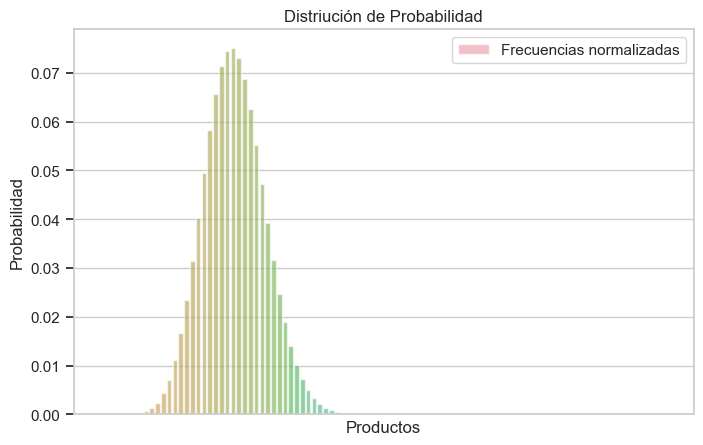

In [44]:
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(8, 5))

# Plot the first set of bars with higher transparency
sns.barplot(x='Producto', y='Poisson', data=df2, alpha=0.6, label='Frecuencias normalizadas')

#sns.barplot(x='Pedidos', y='Frecuencia', data=df, alpha=0.6, label = 'Original')

# Plot the second set of bars with lower transparency
#sns.barplot(x='Pedidos', y='Frecuencia ln', data=df, alpha=0.3, label='Valores')

# Add labels and title
plt.xlabel('Productos')
plt.ylabel('Probabilidad')
plt.title('Distriución de Probabilidad')
# Show legend
plt.legend()
plt.tick_params(left = True, right = False , labelleft = True ,
                labelbottom = False, bottom = False)

# Show the plot
plt.show()

## Generación de pedidos

In [10]:
def montecarlo(df, n):  
    resultados = []
    for _ in range(n):
        num = np.random.rand()
        for j in range(len(df)):
            if df[j][3] <= num < df[j][4]:
                resultados.append(j)
            
    return resultados

In [11]:
pedidos = df[['Pedidos','Poisson']]
pedidos['Acumulado'] = pedidos.Poisson.cumsum()
pedidos['Inferior'] = [0] + pedidos['Acumulado'].tolist()[:-1]
pedidos['Superior'] = pedidos['Acumulado']
pedidos = pedidos.to_numpy()

C:\Users\gerar\AppData\Local\Temp\ipykernel_8916\3932492861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos['Acumulado'] = pedidos.Poisson.cumsum()
C:\Users\gerar\AppData\Local\Temp\ipykernel_8916\3932492861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedidos['Inferior'] = [0] + pedidos['Acumulado'].tolist()[:-1]


In [12]:
#num_pedidos = montecarlo(pedidos,df.Frecuencia.sum())
num_pedidos = montecarlo(pedidos,compras.size)


In [13]:
producto = df2[['Producto','Poisson']]
producto['Acumulado'] = producto.Poisson.cumsum()
producto['Inferior'] = [0] + producto['Acumulado'].tolist()[:-1]
producto['Superior'] = producto['Acumulado']
producto = producto.to_numpy()

C:\Users\gerar\AppData\Local\Temp\ipykernel_8916\3891866760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto['Acumulado'] = producto.Poisson.cumsum()
C:\Users\gerar\AppData\Local\Temp\ipykernel_8916\3891866760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  producto['Inferior'] = [0] + producto['Acumulado'].tolist()[:-1]


In [14]:
envios = [np.array(montecarlo(producto, num)) for num in montecarlo(pedidos,100) if num!=0]
envios_np = envios

In [15]:
envios_np

[array([40, 24, 28, 27, 24]),
 array([40, 23, 38, 26, 45]),
 array([23, 32, 23]),
 array([27, 18, 20]),
 array([17, 22, 28, 25]),
 array([22, 30, 28, 50, 32, 21]),
 array([39, 32, 21, 50, 21, 40]),
 array([23, 31, 35, 31, 19, 20, 23, 32, 28, 32, 22, 23, 23, 30, 31, 27]),
 array([27, 26, 25, 40]),
 array([30, 24]),
 array([50, 28]),
 array([27, 30, 23, 25]),
 array([26, 24, 24, 30, 40, 28, 27]),
 array([21, 50, 24, 27, 45, 45]),
 array([17, 29, 21, 24]),
 array([24, 17, 30, 40, 23, 23]),
 array([27, 23, 26, 24, 53]),
 array([26, 17, 40, 28, 23, 40, 23, 22, 22, 24]),
 array([23, 30, 32, 29, 32, 21]),
 array([50, 25, 50, 26]),
 array([26, 25, 24]),
 array([32, 22, 22, 27, 25, 29, 53]),
 array([17, 17, 30, 27, 20, 25, 26, 50]),
 array([50, 27, 28, 30]),
 array([50, 40]),
 array([27, 33, 26]),
 array([28, 21]),
 array([19, 30, 53, 21, 32]),
 array([27, 25, 40]),
 array([24, 32, 15, 40, 40, 27]),
 array([25, 32, 50]),
 array([35, 26, 26, 50, 23, 27, 27]),
 array([32, 26, 23, 40, 25]),
 array

In [16]:
enviosArreglo = np.array([[-1,-1,-1]])
for i in range(len(envios)):
    a = np.unique(np.array(envios[i]), return_counts=True)
    enviosArreglo = np.concatenate((enviosArreglo, np.array([np.array([i]*len(a[0])),a[0],a[1]]).T))
enviosArreglo

array([[-1, -1, -1],
       [ 0, 24,  2],
       [ 0, 27,  1],
       ...,
       [98, 28,  1],
       [98, 29,  1],
       [98, 45,  1]], dtype=int64)

In [17]:
envios = pd.DataFrame(enviosArreglo[1:], columns = ['Factura', 'Producto', 'Unidades'])

## Prueba Con Gráficas

In [18]:
df3 = envios.groupby(['Factura']).size().reset_index(name='Frequency').Frequency.value_counts()
df3 = df3.reset_index()
df3.columns = ['Pedidos', 'Frecuencia']
valor_medio = np.sum(df3['Pedidos'] * df3['Frecuencia']) / np.sum(df3['Frecuencia'])
df3['Poisson'] = poisson.pmf(df3['Pedidos'], valor_medio)
df3['valores_esperados'] = df3['Poisson'] * np.sum(df3['Frecuencia'])
df3

,Pedidos,Frecuencia,Poisson,valores_esperados
0,4,21,0.192181,19.025880
1,5,19,0.168109,16.642840
2,6,16,0.122544,12.131902
3,3,14,0.175759,17.400112
4,2,12,0.120555,11.934950
5,7,6,0.076568,7.580251
6,1,6,0.055127,5.457552
7,8,2,0.041861,4.144253
8,9,2,0.020343,2.013986
9,10,1,0.008898,0.880865


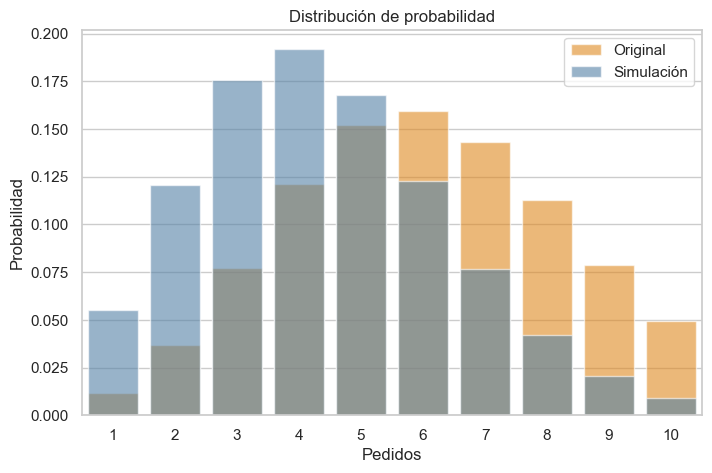

In [19]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(8, 5))

# Plot the first set of bars with higher transparency
sns.barplot(x='Pedidos', y='Poisson', data=df, alpha=0.6, label='Original',color='darkorange')

sns.barplot(x='Pedidos', y='Poisson', data=df3, alpha=0.6, label = 'Simulación',color='steelblue')

# Plot the second set of bars with lower transparency
#sns.barplot(x='Pedidos', y='Frecuencia ln', data=df, alpha=0.3, label='Valores')

# Add labels and title
plt.xlabel('Pedidos')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad')

# Show legend
plt.legend()

# Show the plot
plt.show()

## Costo de envíos

In [20]:
dp = pd.read_csv('info_productos.csv')
dp.columns = ['Producto', 'Volumen']
nuevo_registro = {"Producto": 0, "Volumen": 0}
dp = pd.concat([pd.DataFrame([nuevo_registro]), dp], ignore_index=True)
volumenes = dp.to_numpy()[:,1]

In [21]:
dimensiones = []
for pedido in envios_np:
    acumulado = 0
    for i in pedido:
        acumulado += volumenes[i]
    dimensiones.append(acumulado)